In [244]:
import numpy as np
import matplotlib.pyplot as plt

In [245]:
def cartesian(x, y, z):
    '''(spherical),(cylindrical)'''
    # Spherical: (r, theta, phi)
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r) if r != 0 else 0  
    phi = np.arctan2(y, x)                    
    
    # Cylindrical: (rho, phi, z)
    rho = np.sqrt(x**2 + y**2)
    
    return (r, theta, phi), (rho, phi, z)

def spherical(r, theta, phi):
    '''(cartesian), (cylindrical)'''
    # Cartesian: (x, y, z)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    # Cylindrical: (rho, phi, z)
    rho = r * np.sin(theta)
    
    return (x, y, z), (rho, phi, z)

def cylindrical_to_cartesian_and_spherical(rho, phi, z):
    '''(cartesian),(sperical) '''
    # Cartesian: (x, y, z)
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    
    # Spherical: (r, theta, phi)
    r = np.sqrt(rho**2 + z**2)
    theta = np.arctan2(rho, z) if r != 0 else 0  # polar angle
    
    return (x, y, z), (r, theta, phi)


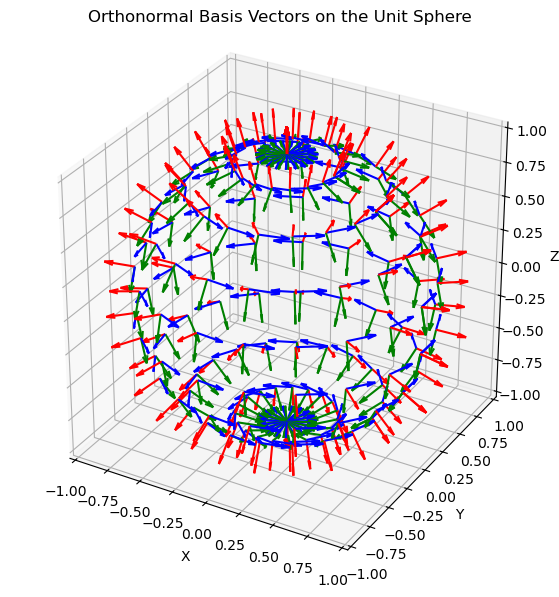

In [246]:
def spherical_basis_vectors(theta, phi):
    
    e_r = np.array([np.sin(theta) * np.cos(phi),
                    np.sin(theta) * np.sin(phi),
                    np.cos(theta)])
    
    e_theta = np.array([np.cos(theta) * np.cos(phi),
                        np.cos(theta) * np.sin(phi),
                        -np.sin(theta)])
    
    e_phi = np.array([-np.sin(phi),
                      np.cos(phi),
                      0])
    
    return e_r, e_theta, e_phi

theta_vals = np.linspace(0, np.pi, 10)   
phi_vals = np.linspace(0, 2 * np.pi, 20) 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])

for theta in theta_vals:
    for phi in phi_vals:
        e_r, e_theta, e_phi = spherical_basis_vectors(theta, phi)
        ax.quiver(e_r[0], e_r[1], e_r[2], e_r[0], e_r[1], e_r[2], color='r', length=0.2, normalize=True)
        ax.quiver(e_r[0], e_r[1], e_r[2], e_theta[0], e_theta[1], e_theta[2],
                  color='g', length=0.2, normalize=True)
        ax.quiver(e_r[0], e_r[1], e_r[2], e_phi[0], e_phi[1], e_phi[2],
                  color='b', length=0.2, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.title("Orthonormal Basis Vectors on the Unit Sphere")
plt.show()


##### c. No it is not, beacuse every point on the unit sphere has a different basis for the coordinate system.

C:\Users\nkras\AppData\Local\Temp\ipykernel_30324\3296403398.py:55: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1 - x**2 - y**2)


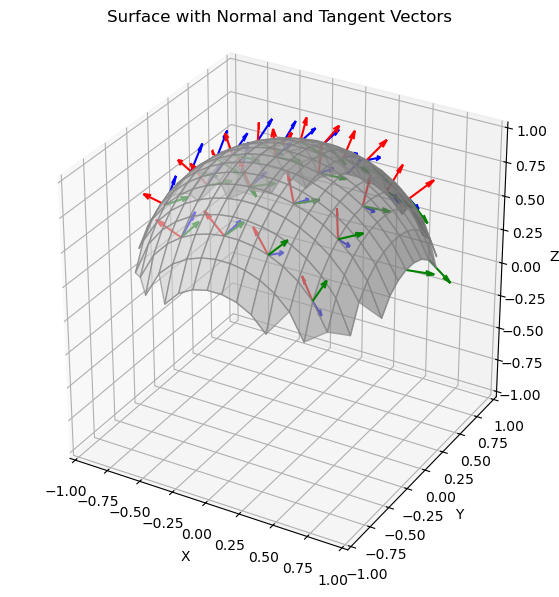

In [247]:
from mpl_toolkits.mplot3d import Axes3D

def local_coordinate_system(f, x_range, y_range, resolution=50):
    # Create meshgrid for surface
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Compute the partial derivatives to get tangent vectors
    dz_dx, dz_dy = np.gradient(Z, x, y, axis=(0, 1))

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1, 1, 1])

    # Plot the surface
    ax.plot_surface(X, Y, Z, color='lightgray', alpha=0.6, edgecolor = "gray")

    for i in range(0, resolution, 3):
        for j in range(0, resolution, 3):
            # Surface point
            p = np.array([X[i, j], Y[i, j], Z[i, j]])

            # Tangent vectors: derivative of position vector wrt x and y
            t_x = np.array([1, 0, dz_dx[i, j]])  # Tangent vector in x direction
            t_y = np.array([0, 1, dz_dy[i, j]])  # Tangent vector in y direction

            # Normalize tangent vectors
            t_x /= np.linalg.norm(t_x)
            t_y /= np.linalg.norm(t_y)

            # Compute the normal vector (cross product of tangent vectors)
            n = np.cross(t_x, t_y)
            n /= np.linalg.norm(n)  # Normalize normal vector

            # Plot the vectors: red for normal, green for tangent in x, blue for tangent in y
            ax.quiver(*p, *n, color='r', length=0.2, normalize=True)
            ax.quiver(*p, *t_x, color='g', length=0.2, normalize=True)
            ax.quiver(*p, *t_y, color='b', length=0.2, normalize=True)

    # Set plot limits and labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_zlim([-1, 1])

    plt.title("Surface with Normal and Tangent Vectors")
    plt.show()

# Define the surface function (unit sphere)
def surface_function(x, y):
    z = np.sqrt(1 - x**2 - y**2)  
    z[x**2 + y**2 > 1] = np.nan  # Set NaN for data outside the unit circle
    return z

# Call the function with surface function and plotting settings
local_coordinate_system(surface_function, x_range=(-1, 1), y_range=(-1, 1), resolution=20)


##### 1d

In [248]:
def parallel_transport(theta0, phi0, alpha, beta, num_data):
   
    # creating a unit speed parametrization of the lines theta values
    theta = np.linspace(theta0, np.pi / 2, num_data)

    # Initialize vector components in spherical coordinates
    n_theta = np.zeros_like(theta)
    n_phi = np.zeros_like(theta)
    n_theta[0] = alpha
    n_phi[0] = beta * np.sin(theta0)
    
    
    # Differential equations for parallel transport
    for i in range(1, len(theta)):
        d_phi = -(n_phi[0]/np.tan(theta[i]))* (theta[i] - theta[i-1])
        n_theta[i] = alpha
        n_phi[i] = n_phi[i-1] + d_phi

    # Convert the spherical coordinates to Cartesian for visualization
    x,y,z = spherical(1, theta, phi0)[0]

    # Convert the vector components to Cartesian coordinates
    vx, vy, vz = spherical(1, theta, phi0)[0]* n_theta
    

    # normalizing magnitude of the vectors
    for i in range(len(vx)):
        norm = np.sqrt(vx[i]**2 + vy[i]**2 + vz[i]**2)
        vx[i], vy[i], vz[i] = vx[i]/norm, vy[i]/norm , vz[i]/norm

    return x,y,z,vx,vy,vz


##### e)

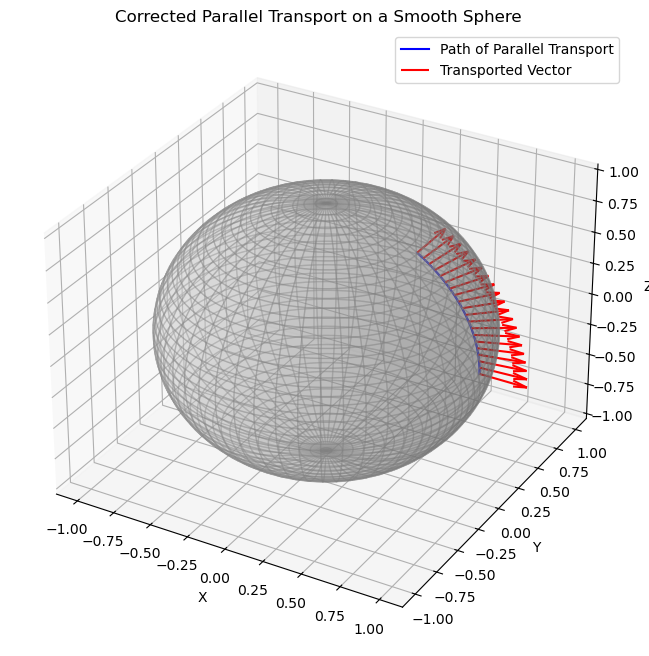

In [249]:
# Initial conditions
theta0 = np.pi / 5 
phi0 = 0
alpha = 0.5
beta = 0.5

x, y, z, vx, vy, vz = parallel_transport(theta0, phi0, alpha, beta, num_data=20)
resolution=100
# Create the sphere for visualization
theta_sphere = np.linspace(0, np.pi, resolution)
phi_sphere = np.linspace(0, 2 * np.pi, resolution)
theta_sphere, phi_sphere = np.meshgrid(theta_sphere, phi_sphere)
x_sphere = np.sin(theta_sphere) * np.cos(phi_sphere)
y_sphere = np.sin(theta_sphere) * np.sin(phi_sphere)
z_sphere = np.cos(theta_sphere)

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightgray', alpha=0.3, edgecolor='gray')
ax.plot(x, y, z, 'b-', label="Path of Parallel Transport")
ax.quiver(x, y, z, vx, vy, vz, length=0.3, color="r", label="Transported Vector")
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Corrected Parallel Transport on a Smooth Sphere")
plt.show()

##### f)

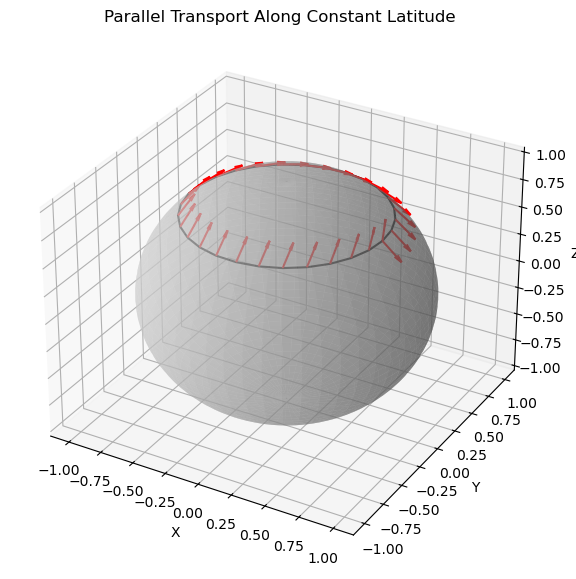

In [250]:
from scipy.integrate import solve_ivp

def parallel_transport(phi, n, theta0):
    n_theta, n_phi = n
    dn_theta_dphi = np.arctan(theta0) * n_phi
    dn_phi_dphi = -np.arctan(theta0) * n_theta
    return [dn_theta_dphi, dn_phi_dphi]

def spherical_to_cartesian(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def vector_to_cartesian(n_theta, n_phi, theta, phi):
    vec_x = n_theta * np.cos(theta) * np.cos(phi) - n_phi * np.sin(phi)
    vec_y = n_theta * np.cos(theta) * np.sin(phi) + n_phi * np.cos(phi)
    vec_z = -n_theta * np.sin(theta)
    return vec_x, vec_y, vec_z

def solve_transport(theta0, alpha, beta, phi_range, num_data):
    phi_values = np.linspace(*phi_range, num_points)
    solution = solve_ivp(parallel_transport, phi_range, [alpha, beta], t_eval=phi_values, args=(theta0,))
    return phi_values, solution.y[0], solution.y[1]

def plot_sphere(ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='lightgrey', alpha=0.5)

def add_geodesic(ax, theta0, phi_values):
    x, y, z = spherical_to_cartesian(theta0, phi_values)
    ax.plot(x, y, z, color='black')

def add_vectors(ax, theta0, phi_values, n_theta_vals, n_phi_vals):
    x, y, z = spherical_to_cartesian(theta0, phi_values)
    vec_x, vec_y, vec_z = vector_to_cartesian(n_theta_vals, n_phi_vals, theta0, phi_values)
    ax.quiver(x, y, z, vec_x, vec_y, vec_z, color='red', length=0.2, normalize=True)

def plot_parallel_transport(theta0, alpha, beta, phi_range, num_points):
    phi_values, n_theta_vals, n_phi_vals = solve_transport(theta0, alpha, beta, phi_range, num_points)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    plot_sphere(ax)
    add_geodesic(ax, theta0, phi_values)
    add_vectors(ax, theta0, phi_values, n_theta_vals, n_phi_vals)
    ax.set_title("Parallel Transport Along Constant Latitude")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

theta0 = np.pi / 4
alpha, beta = 1.0, 0.0
phi_range = (0, 2 * np.pi)
num_points = 30
plot_parallel_transport(theta0, alpha, beta, phi_range, num_points)


##### g)

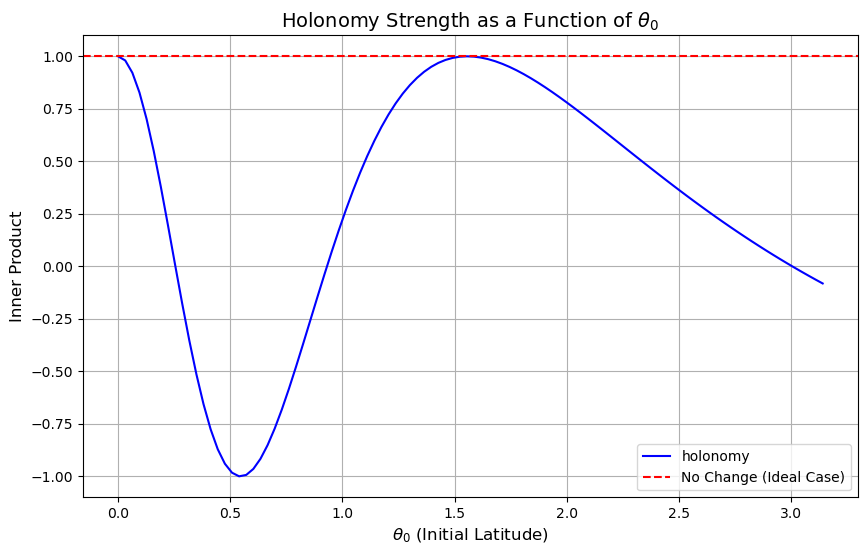

In [251]:

def parallel_transport(phi, n, theta0):
    n_theta, n_phi = n
    dn_theta_dphi = np.arctan(theta0) * n_phi
    dn_phi_dphi = -np.arctan(theta0) * n_theta
    return [dn_theta_dphi, dn_phi_dphi]

def compute_inner_product(theta0, alpha, beta, phi_range):
    solution = solve_ivp(parallel_transport, phi_range, [alpha, beta], t_eval=[phi_range[-1]], args=(theta0,))
    n_final = solution.y[:, -1]
    initial_vector = np.array([alpha, beta])
    final_vector = n_final / np.linalg.norm(n_final)
    return np.dot(initial_vector, final_vector)

def plot_holonomy(theta_range, alpha, beta, phi_range):
    inner_products = [compute_inner_product(theta0, alpha, beta, phi_range) for theta0 in theta_range]
    plt.figure(figsize=(10, 6))
    plt.plot(theta_range, inner_products, label="holonomy", color="blue")
    plt.xlabel(r"$\theta_0$ (Initial Latitude)", fontsize=12)
    plt.ylabel("Inner Product", fontsize=12)
    plt.title(r"Holonomy Strength as a Function of $\theta_0$", fontsize=14)
    plt.axhline(1.0, color="red", linestyle="--", label="No Change (Ideal Case)")
    plt.legend()
    plt.grid()
    plt.show()

theta_range = np.linspace(0, np.pi, 100)
alpha, beta = 1.0, 0.0
phi_range = (0, 2 * np.pi)
plot_holonomy(theta_range, alpha, beta, phi_range)


#### 2a

C:\Users\nkras\AppData\Local\Temp\ipykernel_30324\1917569490.py:47: RuntimeWarning: invalid value encountered in divide
  tx_proj = (tx * (1 - z) + x * tz) / denom
C:\Users\nkras\AppData\Local\Temp\ipykernel_30324\1917569490.py:48: RuntimeWarning: invalid value encountered in divide
  ty_proj = (ty * (1 - z) + y * tz) / denom


Angle on sphere: 82.49828187911353 degrees
Angle on plane: 82.78644085572783 degrees


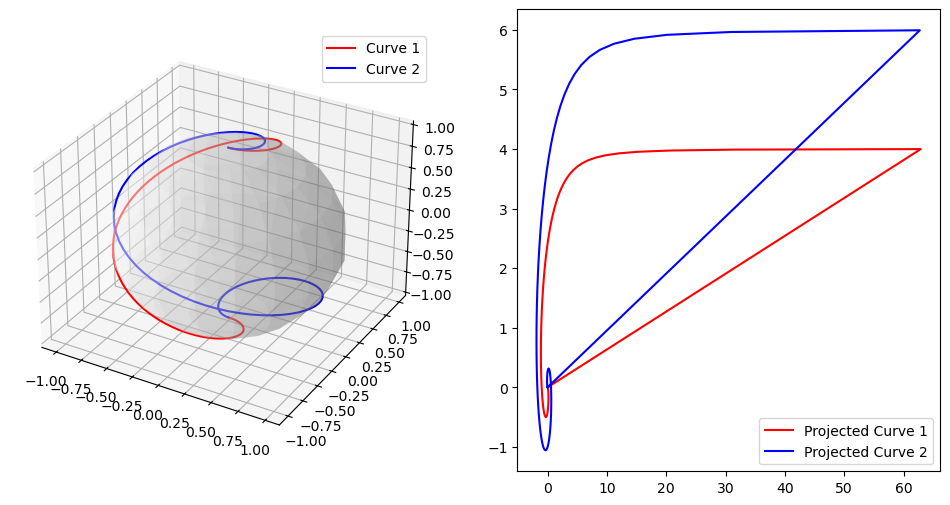

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Stereographic projection
def stereographic_projection(x, y, z):
    # Avoid division by zero by masking out points where z == 1 (north pole)
    mask = z != 1  # Mask for valid points
    x_proj = np.zeros_like(x)  # Initialize projected x-coordinates
    y_proj = np.zeros_like(y)  # Initialize projected y-coordinates
    
    # Compute projection only for valid points
    x_proj[mask] = x[mask] / (1 - z[mask])
    y_proj[mask] = y[mask] / (1 - z[mask])
    
    return x_proj, y_proj

# Define arbitrary curves on the sphere
def curve1(theta):
    return np.array([np.sin(theta) * np.cos(2 * theta), 
                     np.sin(theta) * np.sin(2 * theta), 
                     np.cos(theta)])

def curve2(theta):
    return np.array([np.sin(theta) * np.cos(3 * theta), 
                     np.sin(theta) * np.sin(3 * theta), 
                     np.cos(theta)])

# Parameter for the curves
theta = np.linspace(0, np.pi, 100)

# Compute the curves
c1 = curve1(theta)
c2 = curve2(theta)

# Compute tangent vectors on the sphere
t1 = np.gradient(c1, axis=1)
t2 = np.gradient(c2, axis=1)

# Project curves onto the plane
c1_proj = stereographic_projection(c1[0], c1[1], c1[2])
c2_proj = stereographic_projection(c2[0], c2[1], c2[2])

# Project tangent vectors onto the plane
def project_tangent(tx, ty, tz, x, y, z):
    denom = (1 - z)**2
    tx_proj = (tx * (1 - z) + x * tz) / denom
    ty_proj = (ty * (1 - z) + y * tz) / denom
    return tx_proj, ty_proj

t1_proj = project_tangent(t1[0], t1[1], t1[2], c1[0], c1[1], c1[2])
t2_proj = project_tangent(t2[0], t2[1], t2[2], c2[0], c2[1], c2[2])

# Measure angles between tangent vectors
def angle_between(v1, v2):
    return np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

# Choose a point to measure the angle (e.g., midpoint)
idx = 50  # Midpoint of the curves
angle_sphere = angle_between(t1[:, idx], t2[:, idx])
angle_plane = angle_between(np.array([t1_proj[0][idx], t1_proj[1][idx]]), 
                            np.array([t2_proj[0][idx], t2_proj[1][idx]]))

print(f"Angle on sphere: {np.degrees(angle_sphere)} degrees")
print(f"Angle on plane: {np.degrees(angle_plane)} degrees")

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot on the sphere
ax1 = fig.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax1.plot_surface(x, y, z, color='w', alpha=0.3)
ax1.plot(c1[0], c1[1], c1[2], label='Curve 1', color='r')
ax1.plot(c2[0], c2[1], c2[2], label='Curve 2', color='b')
ax1.legend()

# Plot on the plane
ax2 = fig.add_subplot(122)
ax2.plot(c1_proj[0], c1_proj[1], label='Projected Curve 1', color='r')
ax2.plot(c2_proj[0], c2_proj[1], label='Projected Curve 2', color='b')
ax2.legend()

plt.show()

##### b)

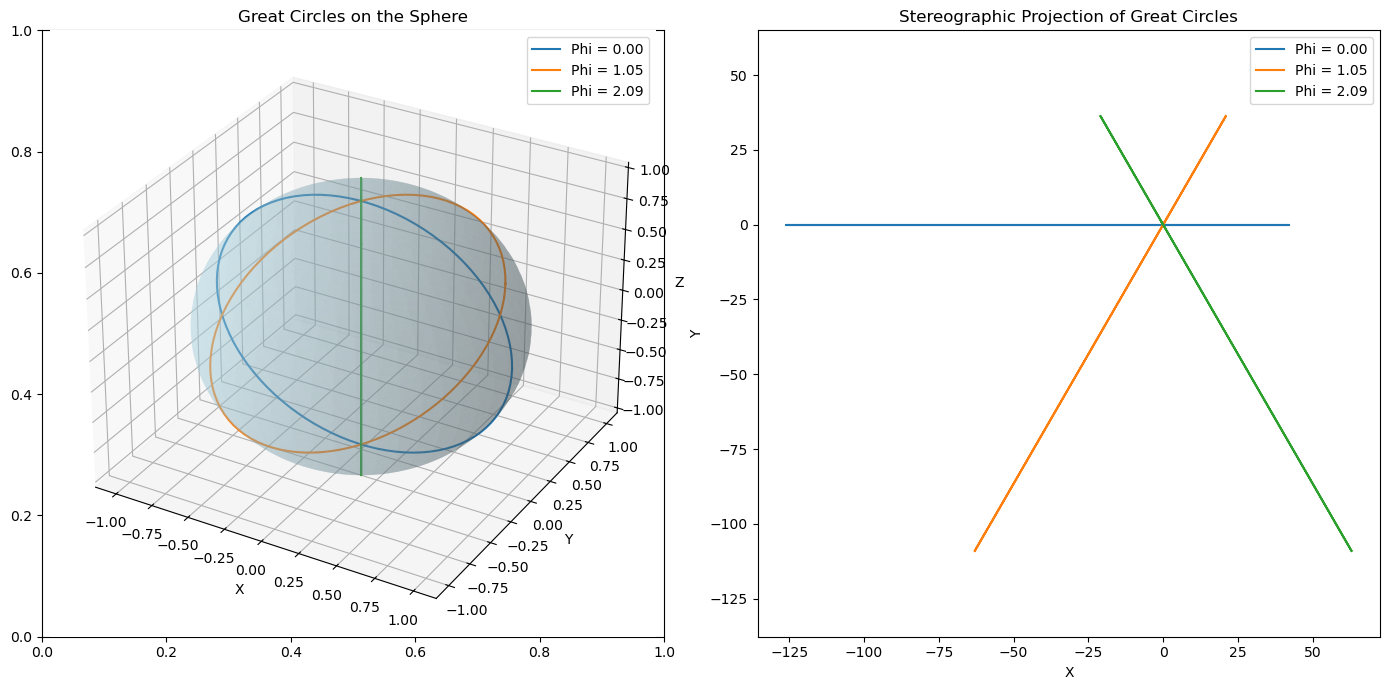

In [253]:

# Function to generate points on a great circle
def generate_great_circle(phi_angle, num_points=100):
    phi = np.linspace(0, 2 * np.pi, num_points)
    x = np.cos(phi) * np.cos(phi_angle)
    y = np.cos(phi) * np.sin(phi_angle)
    z = np.sin(phi)
    return x, y, z

# Stereographic projection function
def stereographic_projection(x, y, z):
    denominator = 1 - z
    x_proj = x / denominator
    y_proj = y / denominator
    return x_proj, y_proj

# Parameters for plotting
num_great_circles = 3
phi_angles = np.linspace(0, np.pi, num_great_circles, endpoint=False)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7), subplot_kw={'projection': None})
ax_sphere = fig.add_subplot(121, projection='3d')
ax_plane = axes[1]

# Plot great circles on the sphere
for phi_angle in phi_angles:
    x, y, z = generate_great_circle(phi_angle)
    ax_sphere.plot(x, y, z, label=f'Phi = {phi_angle:.2f}')

    # Project to the plane
    x_proj, y_proj = stereographic_projection(x, y, z)
    ax_plane.plot(x_proj, y_proj, label=f'Phi = {phi_angle:.2f}')

# Sphere visualization
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax_sphere.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)
ax_sphere.set_title('Great Circles on the Sphere')
ax_sphere.set_xlabel('X')
ax_sphere.set_ylabel('Y')
ax_sphere.set_zlabel('Z')
ax_sphere.legend()

# Plane visualization
ax_plane.set_title('Stereographic Projection of Great Circles')
ax_plane.set_xlabel('X')
ax_plane.set_ylabel('Y')
ax_plane.set_aspect('equal', adjustable='datalim')
ax_plane.legend()

plt.tight_layout()
plt.show()


##### It looks like great circles passing through the north pole show up as lines in the stereographic projection.
##### c)

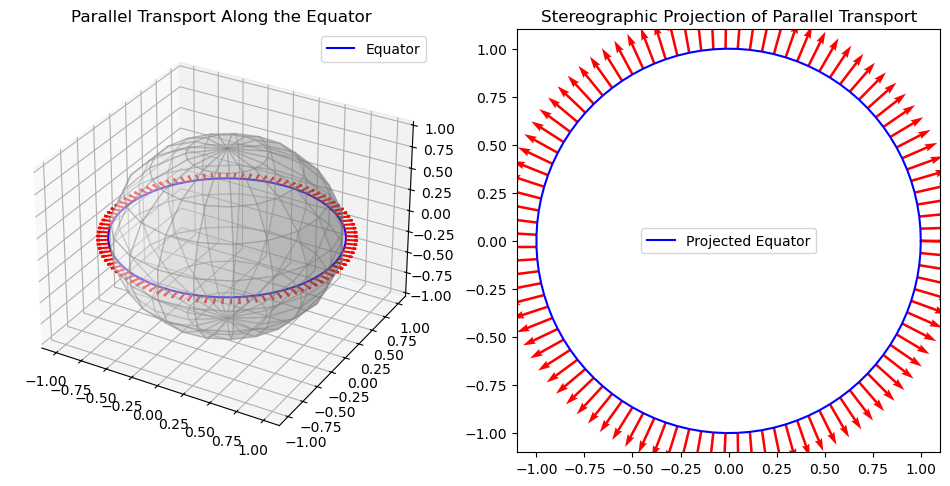

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Stereographic projection function
def stereographic_projection(x, y, z):
    denom = 1 - z
    mask = denom != 0
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    x_proj[mask] = x[mask] / denom[mask]
    y_proj[mask] = y[mask] / denom[mask]
    return x_proj, y_proj

# Define the equator (great circle at theta = pi/2)
def equator(theta):
    return np.array([
        np.cos(theta),  # x-coordinate
        np.sin(theta),  # y-coordinate
        np.zeros_like(theta)  # z-coordinate (equator lies on z = 0)
    ])

def parallel_transport(initial_vector, curve_points):
    transported_vectors = [initial_vector]
    for i in range(1, len(curve_points)):
        previous_vector = transported_vectors[-1]
        previous_point = curve_points[i - 1]
        next_point = curve_points[i]
        
        tangent_vector = next_point - previous_point
        tangent_vector /= np.linalg.norm(tangent_vector)
        
        adjusted_vector = previous_vector - np.dot(previous_vector, next_point) * next_point  
        adjusted_vector -= np.dot(adjusted_vector, tangent_vector) * tangent_vector  
        transported_vectors.append(adjusted_vector / np.linalg.norm(adjusted_vector))  
    return np.array(transported_vectors)


# Parameters
theta = np.linspace(0, 2 * np.pi, 100)  # Parameter for the equator
equator_points = equator(theta).T  # Points on the equator (transposed for shape consistency)

# Initial vector for parallel transport
initial_vector = np.array([1, 0, 0])  # Example initial vector (tangent to the equator)

# Perform parallel transport
transported_vectors = parallel_transport(initial_vector, equator_points)

# Project equator and transported vectors using stereographic projection
equator_proj_x, equator_proj_y = stereographic_projection(equator_points[:, 0], equator_points[:, 1], equator_points[:, 2])
transported_proj_x, transported_proj_y = stereographic_projection(transported_vectors[:, 0], transported_vectors[:, 1], transported_vectors[:, 2])

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot on the sphere
ax1 = fig.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax1.plot_surface(x, y, z, color='w', alpha=0.3, edgecolor='grey')
ax1.plot(equator_points[:, 0], equator_points[:, 1], equator_points[:, 2], label='Equator', color='b')
ax1.quiver(equator_points[:, 0], equator_points[:, 1], equator_points[:, 2], transported_vectors[:, 0], transported_vectors[:, 1], transported_vectors[:, 2], color='r', length=0.1, normalize=True)
ax1.set_title('Parallel Transport Along the Equator')
ax1.legend()

# Plot on the plane
ax2 = fig.add_subplot(122)
ax2.plot(equator_proj_x, equator_proj_y, label='Projected Equator', color='b')
ax2.quiver(equator_proj_x, equator_proj_y, transported_proj_x, transported_proj_y, color='r', angles='xy', scale_units='xy', scale=5)
ax2.set_title('Stereographic Projection of Parallel Transport')
ax2.legend()
ax2.set_aspect('equal')

plt.show()

##### d)

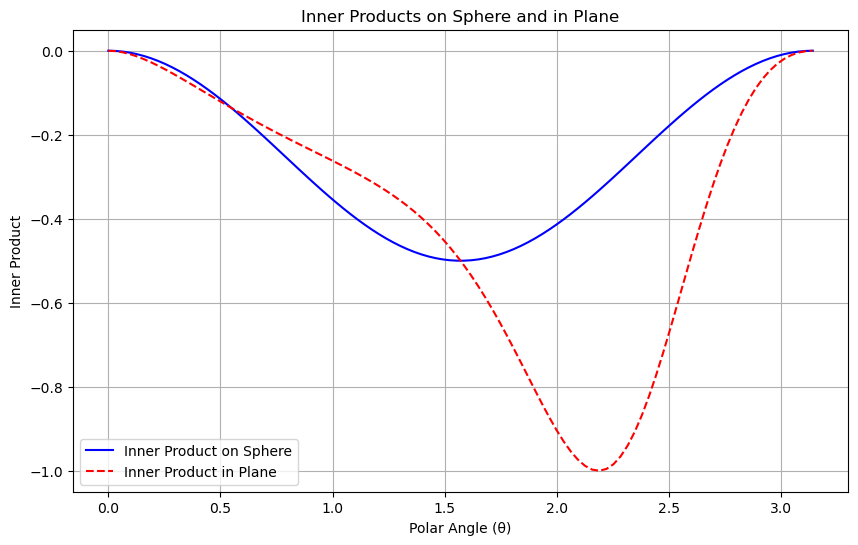

In [255]:
theta = np.linspace(0, np.pi, 100)  # Polar angle
phi = np.pi / 4  # Fixed azimuthal angle

# Points on the sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Define two vectors at each point
vector1 = np.array([1.0, 0.0, 0.0])  # Example vector 1
vector2 = np.array([0.0, 1.0, 0.0])  # Example vector 2

# Arrays to store inner products
inner_products_sphere = []
inner_products_plane = []

# Compute inner products for each point
for i in range(len(theta)):
    point = np.array([x[i], y[i], z[i]], dtype=float)
    
    # Ensure the vectors are tangent to the sphere at the chosen point
    v1 = vector1 - np.dot(vector1, point) * point
    v2 = vector2 - np.dot(vector2, point) * point
    
    # Compute the inner product on the sphere
    inner_product_sphere = np.dot(v1, v2)
    inner_products_sphere.append(inner_product_sphere)
    
    # Project the vectors using stereographic projection
    v1_proj_x, v1_proj_y = stereographic_projection(v1[0], v1[1], v1[2])
    v2_proj_x, v2_proj_y = stereographic_projection(v2[0], v2[1], v2[2])
    
    # Compute the inner product in the plane
    inner_product_plane = v1_proj_x * v2_proj_x + v1_proj_y * v2_proj_y
    inner_products_plane.append(inner_product_plane)

# Plot the inner products
plt.figure(figsize=(10, 6))
plt.plot(theta, inner_products_sphere, label='Inner Product on Sphere', color='b')
plt.plot(theta, inner_products_plane, label='Inner Product in Plane', color='r', linestyle='--')
plt.xlabel('Polar Angle (θ)')
plt.ylabel('Inner Product')
plt.title('Inner Products on Sphere and in Plane')
plt.legend()
plt.grid(True)
plt.show()

##### The inner product is not preserved, as the stereographic projection is conformal but neither isometric nor equiareal.
##### f)
##### No it cant alter the holonomy on the sphere.The holonomy is a property of the geometry of a sphere and the stereographic mapping is just a way to visualise curves on the sphere in 2d. It wont affect the change in orientation of a vector after parallel transport. 

##### Problem 3a

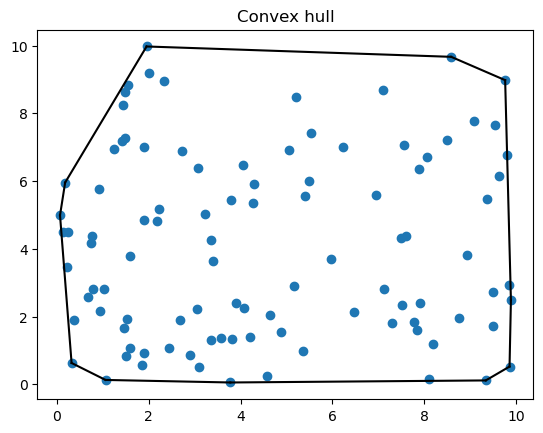

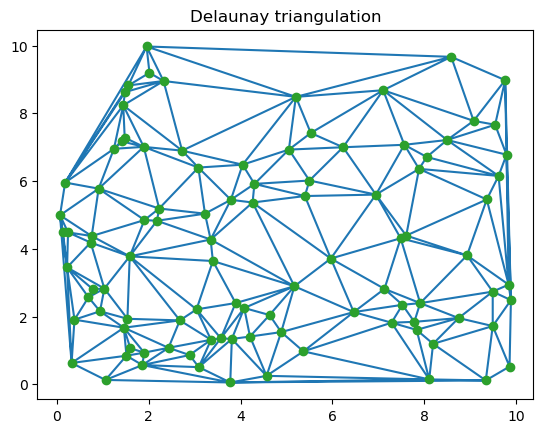

In [256]:
from scipy.spatial import ConvexHull, Delaunay

data = np.loadtxt('mesh.dat', skiprows= 1)

hull = ConvexHull(data)

plt.plot(data[:, 0], data[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(data[simplex, 0], data[simplex, 1], 'k-')
plt.title("Convex hull")
plt.show()

tri = Delaunay(data)
plt.triplot(data[:, 0], data[:, 1], tri.simplices)
plt.plot(data[:, 0], data[:, 1], 'o')
plt.title("Delaunay triangulation")
plt.show()

##### 3b

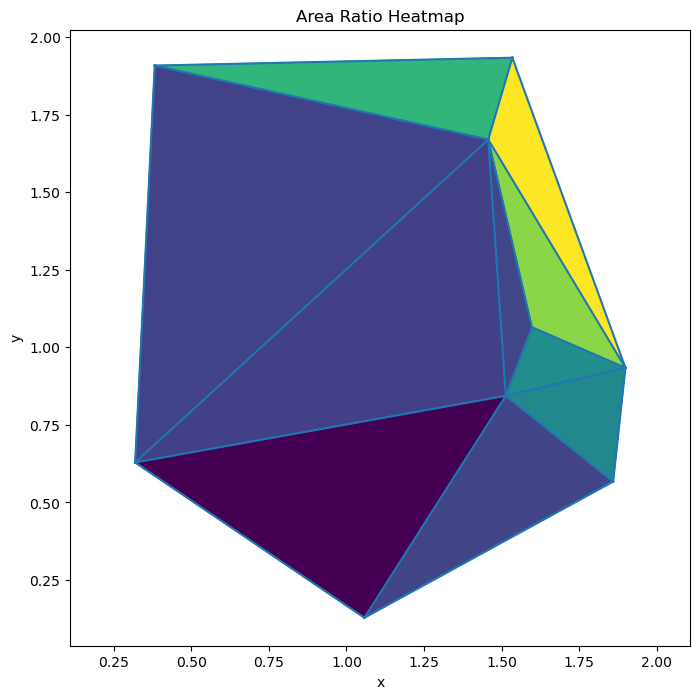

In [257]:
data = data[(data[:,0] <2) & (data[:,1] < 2)]

tri = Delaunay(data)

def lift(x,y):
    return x**2 + y**2

# Function to calculate triangle area
def triangle_area(vertices):
    v1, v2, v3 = vertices
    return 0.5 * np.linalg.norm((np.cross(v2 - v1, v3 - v1)))


ratios = []
for simplex in tri.simplices:
    v1 = data[simplex[0]]
    v2 = data[simplex[1]]
    v3 = data[simplex[2]]

    area_2d = triangle_area((v1, v2, v3))

    z1, z2, z3 = lift(v1[0], v1[1]), lift(v2[0], v2[1]), lift(v3[0], v3[1])
    v1 = np.append(v1, z1)
    v2 = np.append(v2, z2)
    v3 = np.append(v3, z3)
    

    # Calculate areas
    area_3d = triangle_area((v1, v2, v3))
    # Avoid division by zero
    ratio = area_3d / area_2d if area_2d != 0 else 0
    ratios.append(ratio)

# Normalize ratios for coloring
ratios = np.array(ratios)
norm_ratios = (ratios - ratios.min()) / (ratios.max() - ratios.min())

# Plot the triangles with `plt.fill`
plt.figure(figsize=(8, 8))
for i, simplex in enumerate(tri.simplices):
    triangle = data[simplex]
    plt.fill(triangle[:, 0], triangle[:, 1], color=plt.cm.viridis(norm_ratios[i]))

plt.triplot(data[:, 0], data[:, 1], tri.simplices)


# Final touches
plt.title('Area Ratio Heatmap')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


##### 3c
##### The induced metric can be found by taking the partial derivatives of the lifting function, which can then be used to find the metric tensor components

In [258]:
def metric_tensor(x, y):
    """
    Compute the metric tensor g_ij for the surface z = x^2 + y^2 at point (x, y).
    """
    g_xx = 1 + 4 * x**2
    g_xy = 4 * x * y
    g_yy = 1 + 4 * y**2
    
    g_ij = np.array([[g_xx, g_xy],
                     [g_xy, g_yy]])
    return g_ij
for i in range(len(data[:,1])):
    print(metric_tensor(data[i,0], data[i,1]))

[[11.21591178  6.80788253]
 [ 6.80788253  5.5367722 ]]
[[ 1.58347293  2.91559558]
 [ 2.91559558 15.56913784]]
[[15.43054715  7.09683596]
 [ 7.09683596  4.49017124]]
[[14.83624248  4.22040528]
 [ 4.22040528  2.28733078]]
[[10.42283707 11.87235527]
 [11.87235527 15.95863917]]
[[5.47634728 0.5430507 ]
 [0.5430507  1.06588052]]
[[ 9.49322609  9.73424008]
 [ 9.73424008 12.15658866]]
[[1.40647    0.80193717]
 [0.80193717 2.5821665 ]]
[[10.16712473  5.11072277]
 [ 5.11072277  3.84925622]]


##### 3d

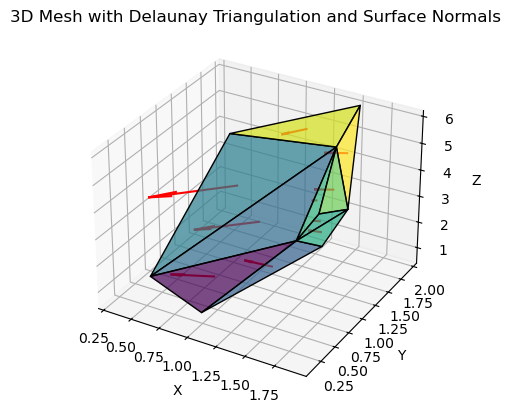

In [259]:

# Compute lifted Z values
z = np.array([lift(point[0], point[1]) for point in data])
data = np.column_stack((data, z))  # Combine X, Y, Z

# Compute 3D Delaunay triangulation
tri = Delaunay(data[:, :2])  # Triangulate based on (x, y) positions
faces = tri.simplices  # Triangle indices

# Compute surface normals
def compute_normal(v1, v2, v3):
    t1 = v2 - v1
    t2 = v3 - v1
    normal = np.cross(t1, t2)
    return normal

normals = []
centroids = []
for face in faces:
    v1, v2, v3 = data[face[0]], data[face[1]], data[face[2]]
    normal = compute_normal(v1, v2, v3)
    centroid = (v1 + v2 + v3) / 3  # Compute centroid of the triangle
    normals.append(normal)
    centroids.append(centroid)

normals = np.array(normals)
centroids = np.array(centroids)

# Plot the mesh and normals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
ax.plot_trisurf(data[:, 0], data[:, 1], data[:, 2], triangles=faces, cmap='viridis', edgecolor='black', alpha=0.7)

# Plot normals at centroids
ax.quiver(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    normals[:, 0], normals[:, 1], normals[:, 2],
    length=0.2, color='red'
)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh with Delaunay Triangulation and Surface Normals')

plt.show()


##### 3e

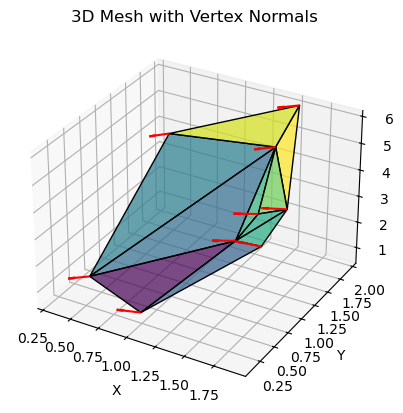

In [260]:

vertex_normals = np.zeros_like(data)  # Store sum of normals at each vertex
face_normals = np.zeros((len(faces), 3))  # Store normals of each face

for i, face in enumerate(faces):
    v1, v2, v3 = data[face[0]], data[face[1]], data[face[2]]
    normal = compute_normal(v1, v2, v3)
    face_normals[i] = normal
    # Add face normal contribution to each vertex
    vertex_normals[face[0]] += normal
    vertex_normals[face[1]] += normal
    vertex_normals[face[2]] += normal

# Normalize vertex normals
vertex_normals /= np.linalg.norm(vertex_normals, axis=1, keepdims=True)

# Plot the mesh and normals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
ax.plot_trisurf(data[:, 0], data[:, 1], data[:, 2], triangles=faces, cmap='viridis', edgecolor='black', alpha=0.7)

# Plot vertex normals
ax.quiver(
    data[:, 0], data[:, 1], data[:, 2],  # Start at each vertex
    vertex_normals[:, 0], vertex_normals[:, 1], vertex_normals[:, 2],  # Normal direction
    length=0.2, color='red'
)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh with Vertex Normals')

plt.show()


##### 3f

In [261]:
# we just dot the normals with the second derivatives to obtain L, M and N
r_xx = np.array([0,0,2])
r_xy = np.array([0,0,0])
r_yy = np.array([0,0,2])


def sf_surface_normal(x, y):
    nx, ny, nz = -2*x, -2*y, 1 
    norm = np.sqrt(nx**2 + ny**2 + nz**2)
    return np.array([nx / norm, ny / norm, nz / norm]).T  
LMN = []

for i in range(len(data[:,0])):
    n = sf_surface_normal(data[i,0], data[i,1])
    L = -np.dot(n, r_xx)
    M = -np.dot(n, r_xy)
    N = -np.dot(n, r_yy)
    LMN.append((L,M,N))

LMN = np.array(LMN)
print(LMN)

[[-0.5039097  -0.         -0.5039097 ]
 [-0.49763238 -0.         -0.49763238]
 [-0.45979176 -0.         -0.45979176]
 [-0.49808028 -0.         -0.49808028]
 [-0.39698268 -0.         -0.39698268]
 [-0.84954778 -0.         -0.84954778]
 [-0.44012082 -0.         -0.44012082]
 [-1.15689368 -0.         -1.15689368]
 [-0.55435104 -0.         -0.55435104]]


##### 3g

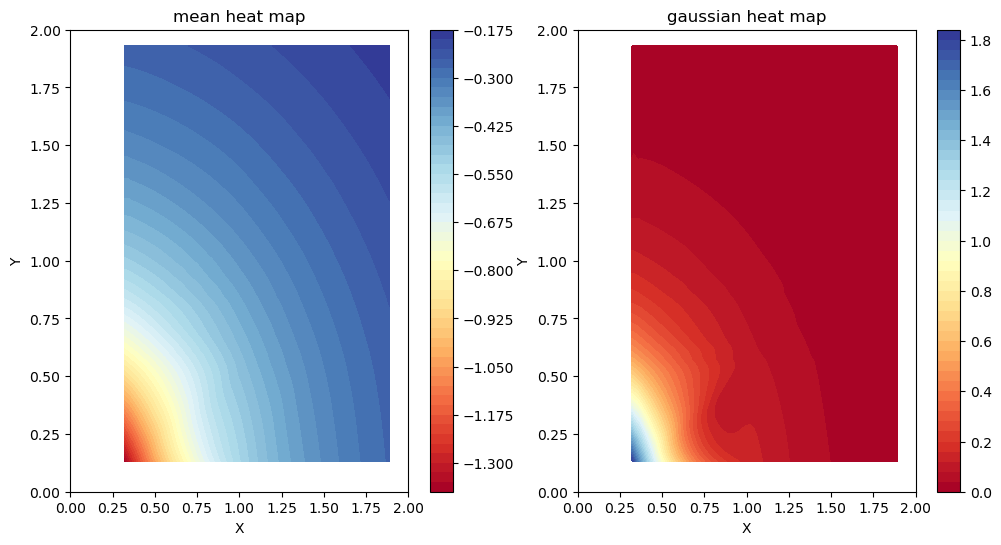

In [262]:
from scipy.interpolate import griddata

x_m, y_m = np.meshgrid(data[:,0], data[:,1])
points = np.column_stack([x_m.ravel(), y_m.ravel()])

def first_form(x,y):
    E = 1 + (2*x)**2
    F = 2*x*2*y
    G = 1 + (2*y)**2
    return np.array([[E,F],[F,G]])

def second_form(x,y):
    n = sf_surface_normal(x,y)
    L = -np.dot(n, r_xx)
    M = -np.dot(n, r_xy)
    N = -np.dot(n, r_yy)
    return np.array([[L,M],[M,N]])

# Compute the shape operator (second fundamental form) matrix

K_vals = []
H_vals = []

for i in range(len(points[:,0])):
    S = np.linalg.inv(first_form(points[i][0],points[i][1] )) @ second_form(points[i][0],points[i][1])
    k_1, k_2 = np.linalg.eigvals(S)
    H_vals.append(k_1* k_2)
    K_vals.append(0.5*(k_1 + k_2))

# Convert the lists to numpy arrays for easier plotting
H_vals = np.array(H_vals)
K_vals = np.array(K_vals)


# Create a meshgrid for interpolation
x_vals = np.linspace(0, 2, 200)  # Create a meshgrid from -2 to 2 in x-direction
y_vals = np.linspace(0, 2, 200)  # Create a meshgrid from -2 to 2 in y-direction
X, Y = np.meshgrid(x_vals, y_vals)  # Generate a grid of x, y values

# Interpolate the mean curvatures (H) on the grid using griddata
grid_H = griddata(points, H_vals, (X, Y), method='cubic')
grid_K = griddata(points, K_vals, (X, Y), method='cubic')
# Visualize the results

# Plot the surface
fig = plt.figure(figsize=(12, 6))

# Surface plot (not necessary if you only care about curvature)
ax1 = fig.add_subplot(121)
contour = ax1.contourf(X, Y, grid_K, 50, cmap='RdYlBu')
fig.colorbar(contour)
ax1.set_title("mean heat map")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')


# Contour plot for mean curvature
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, grid_H, 50, cmap='RdYlBu')
fig.colorbar(contour)
ax2.set_title("gaussian heat map")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.show()


##### 3h

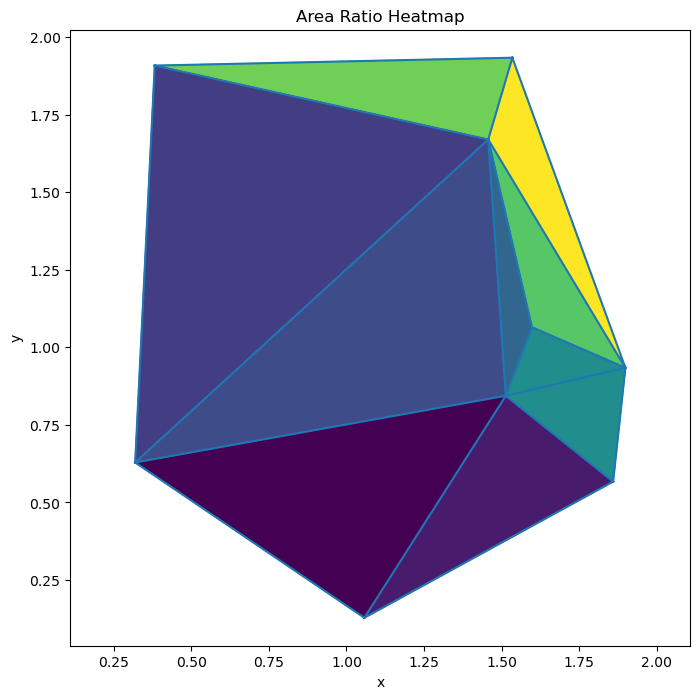

In [263]:
data = data[:,:2]
data = data[(data[:,0] <2) & (data[:,1] < 2)]

tri = Delaunay(data)

def lift(x,y):
    return x**2 + x*y + y**2

# Function to calculate triangle area
def triangle_area(vertices):
    v1, v2, v3 = vertices
    return 0.5 * np.linalg.norm((np.cross(v2 - v1, v3 - v1)))


ratios = []
for simplex in tri.simplices:
    v1 = data[simplex[0]]
    v2 = data[simplex[1]]
    v3 = data[simplex[2]]

    area_2d = triangle_area((v1, v2, v3))

    z1, z2, z3 = lift(v1[0], v1[1]), lift(v2[0], v2[1]), lift(v3[0], v3[1])
    v1 = np.append(v1, z1)
    v2 = np.append(v2, z2)
    v3 = np.append(v3, z3)
    

    # Calculate areas
    area_3d = triangle_area((v1, v2, v3))
    # Avoid division by zero
    ratio = area_3d / area_2d if area_2d != 0 else 0
    ratios.append(ratio)

# Normalize ratios for coloring
ratios = np.array(ratios)
norm_ratios = (ratios - ratios.min()) / (ratios.max() - ratios.min())

# Plot the triangles with `plt.fill`
plt.figure(figsize=(8, 8))
for i, simplex in enumerate(tri.simplices):
    triangle = data[simplex]
    plt.fill(triangle[:, 0], triangle[:, 1], color=plt.cm.viridis(norm_ratios[i]))

plt.triplot(data[:, 0], data[:, 1], tri.simplices)


# Final touches
plt.title('Area Ratio Heatmap')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


In [264]:
def metric_tensor(x, y):
   
    g_xx = 1 + 4*x**2 + 4*x*y +y**2
    g_xy = 4*x*y + 2*x**2 + 2*y**2 + x*y
    g_yy = 1 + 4*y**2 + 3*x*y + x**2
    
    g_ij = np.array([[g_xx, g_xy],
                     [g_xy, g_yy]])
    return g_ij
for i in range(len(data[:,1])):
    print(metric_tensor(data[i,0], data[i,1]))

[[19.15798737 15.88619516]
 [15.88619516 13.19666205]]
[[ 8.14135297 11.22079986]
 [11.22079986 17.90170276]]
[[23.39992592 17.83140414]
 [17.83140414 13.420435  ]]
[[19.37848046 12.83729323]
 [12.83729323  8.91169536]]
[[26.03485214 27.03118221]
 [27.03118221 27.21861489]]
[[6.03586812 2.94992728]
 [2.94992728 2.59225536]]
[[22.01661333 21.99270747]
 [21.99270747 21.58057524]]
[[2.60394879 1.99673971]
 [1.99673971 3.28523687]]
[[15.99016155 12.39659394]
 [12.39659394  9.97407948]]


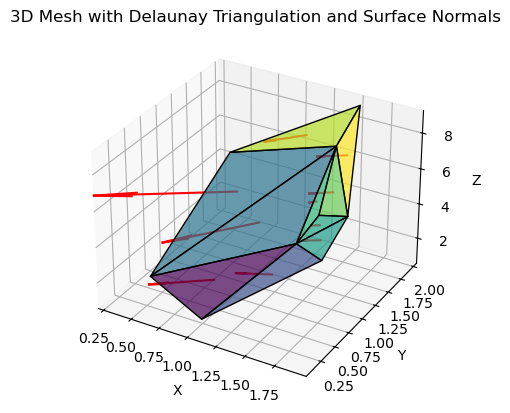

In [265]:

# Compute lifted Z values
z = np.array([lift(point[0], point[1]) for point in data])
data = np.column_stack((data, z))  # Combine X, Y, Z

# Compute 3D Delaunay triangulation
tri = Delaunay(data[:, :2])  # Triangulate based on (x, y) positions
faces = tri.simplices  # Triangle indices

# Compute surface normals
def compute_normal(v1, v2, v3):
    t1 = v2 - v1
    t2 = v3 - v1
    normal = np.cross(t1, t2)
    return normal

normals = []
centroids = []
for face in faces:
    v1, v2, v3 = data[face[0]], data[face[1]], data[face[2]]
    normal = compute_normal(v1, v2, v3)
    centroid = (v1 + v2 + v3) / 3  # Compute centroid of the triangle
    normals.append(normal)
    centroids.append(centroid)

normals = np.array(normals)
centroids = np.array(centroids)

# Plot the mesh and normals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
ax.plot_trisurf(data[:, 0], data[:, 1], data[:, 2], triangles=faces, cmap='viridis', edgecolor='black', alpha=0.7)

# Plot normals at centroids
ax.quiver(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    normals[:, 0], normals[:, 1], normals[:, 2],
    length=0.2, color='red'
)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh with Delaunay Triangulation and Surface Normals')

plt.show()


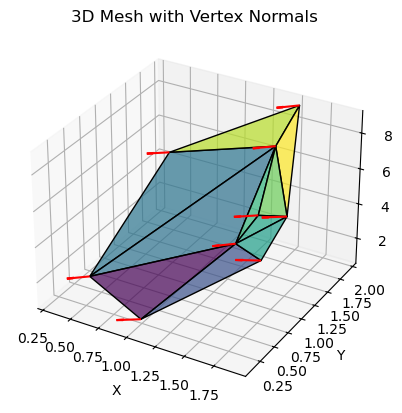

In [266]:

vertex_normals = np.zeros_like(data)  # Store sum of normals at each vertex
face_normals = np.zeros((len(faces), 3))  # Store normals of each face

for i, face in enumerate(faces):
    v1, v2, v3 = data[face[0]], data[face[1]], data[face[2]]
    normal = compute_normal(v1, v2, v3)
    face_normals[i] = normal
    # Add face normal contribution to each vertex
    vertex_normals[face[0]] += normal
    vertex_normals[face[1]] += normal
    vertex_normals[face[2]] += normal

# Normalize vertex normals
vertex_normals /= np.linalg.norm(vertex_normals, axis=1, keepdims=True)

# Plot the mesh and normals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
ax.plot_trisurf(data[:, 0], data[:, 1], data[:, 2], triangles=faces, cmap='viridis', edgecolor='black', alpha=0.7)

# Plot vertex normals
ax.quiver(
    data[:, 0], data[:, 1], data[:, 2],  # Start at each vertex
    vertex_normals[:, 0], vertex_normals[:, 1], vertex_normals[:, 2],  # Normal direction
    length=0.2, color='red'
)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh with Vertex Normals')

plt.show()


In [267]:
r_xx = np.array([2,1,0])
r_xy = np.array([0,2,0])
r_yy = np.array([1,1,0])


def sf_surface_normal(x, y):
    nx, ny, nz = -2*x - y, -2*y - x, 1 
    norm = np.sqrt(nx**2 + ny**2 + nz**2)
    return np.array([nx / norm, ny / norm, nz / norm]).T  
LMN = []

for i in range(len(data[:,0])):
    n = sf_surface_normal(data[i,0], data[i,1])
    L = -np.dot(n, r_xx)
    M = -np.dot(n, r_xy)
    N = -np.dot(n, r_yy)
    LMN.append((L,M,N))

LMN = np.array(LMN)
print(LMN)

[[2.13071556 1.29684124 1.38956809]
 [1.87990523 1.65420711 1.35350439]
 [2.15826749 1.22893719 1.38636804]
 [2.17288233 1.12488546 1.36766253]
 [2.07363606 1.4540127  1.40032121]
 [2.08252256 0.9435492  1.27714858]
 [2.0812295  1.42979161 1.39806265]
 [1.82158906 1.39769171 1.26021746]
 [2.13662538 1.25006155 1.38082808]]


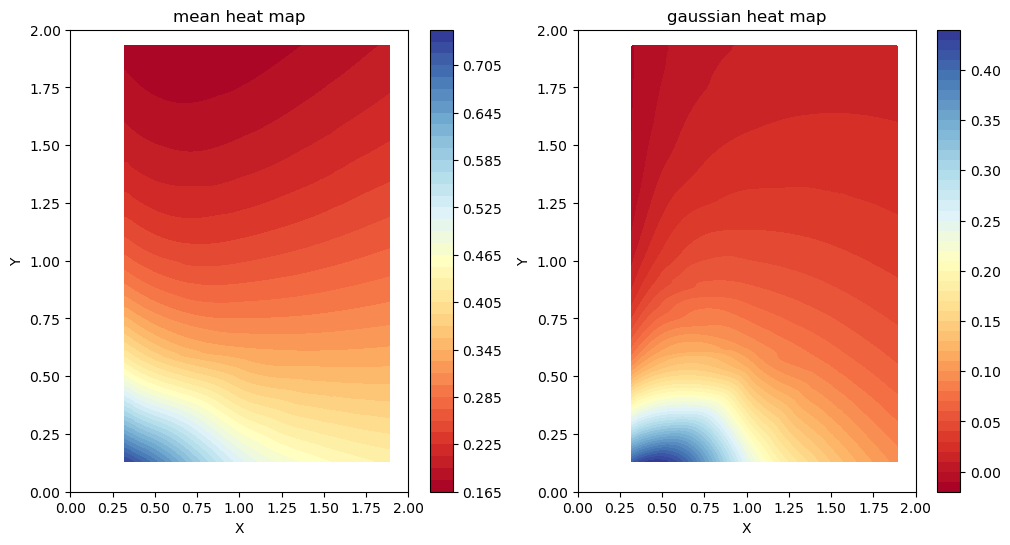

In [268]:

x_m, y_m = np.meshgrid(data[:,0], data[:,1])
points = np.column_stack([x_m.ravel(), y_m.ravel()])

def first_form(x,y):
    E = 1 + (2*x + y)**2
    F = 4*x*y + 2*x**2 + 2*y**2 + x*y
    G = 1 + (2*y + x)**2
    return np.array([[E,F],[F,G]])

def second_form(x,y):
    n = sf_surface_normal(x,y)
    L = -np.dot(n, r_xx)
    M = -np.dot(n, r_xy)
    N = -np.dot(n, r_yy)
    return np.array([[L,M],[M,N]])

# Compute the shape operator (second fundamental form) matrix

K_vals = []
H_vals = []

for i in range(len(points[:,0])):
    S = np.linalg.inv(first_form(points[i][0],points[i][1] )) @ second_form(points[i][0],points[i][1])
    k_1, k_2 = np.linalg.eigvals(S)
    H_vals.append(k_1* k_2)
    K_vals.append(0.5*(k_1 + k_2))

# Convert the lists to numpy arrays for easier plotting
H_vals = np.array(H_vals)
K_vals = np.array(K_vals)


# Create a meshgrid for interpolation
x_vals = np.linspace(0, 2, 200)  # Create a meshgrid from 0 to 2 in x-direction
y_vals = np.linspace(0, 2, 200)  # Create a meshgrid from 0 to 2 in y-direction
X, Y = np.meshgrid(x_vals, y_vals)  # Generate a grid of x, y values

# Interpolate the mean curvatures (H) on the grid using griddata
grid_H = griddata(points, H_vals, (X, Y), method='cubic')
grid_K = griddata(points, K_vals, (X, Y), method='cubic')


# Plot the surface
fig = plt.figure(figsize=(12, 6))

# Surface plot (not necessary if you only care about curvature)
ax1 = fig.add_subplot(121)
contour = ax1.contourf(X, Y, grid_K, 50, cmap='RdYlBu')
fig.colorbar(contour)
ax1.set_title("mean heat map")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')


# Contour plot for mean curvature
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, grid_H, 50, cmap='RdYlBu')
fig.colorbar(contour)
ax2.set_title("gaussian heat map")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.show()
